In [1]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os

In [48]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

# Classification on House Tiers

In [517]:
wrangling_df_2 = wrangling_df.copy()

wrangling_df_2['price'] = pd.cut(wrangling_df_2['price'],
                                 bins = [0, 150, 300, 450, 600],
                                 labels = [0, 1, 2, 3])

wrangling_df_2['price'] = wrangling_df_2['price'].astype(int)

wrangling_df_2['review_scores_rating'] = pd.cut(wrangling_df_2['review_scores_rating'],
                                                bins = [0, 60, 70, 80, 90, 100],
                                                labels = [0, 1, 2, 3, 4])

wrangling_df_2['review_scores_rating'] = wrangling_df_2['review_scores_rating'].astype(int)

In [518]:
classification_data = pd.get_dummies(wrangling_df_2)

In [25]:
classification_X = merged_classification.drop(columns = ['review_scores_rating', 
                                                         'price'])

classification_Y = merged_classification[['review_scores_rating',  
                                          'price']]
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(classification_X, classification_Y, test_size = 0.20)

In [26]:
X_train_2.shape

(11790, 79)

## For price

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

### Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(solver = 'newton-cg', multi_class = 'multinomial', penalty = 'l2', max_iter = 1000)

In [80]:
classifier(logit, X_train_2, Y_train_2['price'], X_test_2, Y_test_2['price'])

/Users/zhaoxuanyi/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


0.8480325644504749

In [86]:
parameters_C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]

In [6]:
cv_logit = {}
for i in parameters_C:
    cv_logit[i] = {}
    print (i)
    logit = LogisticRegression(solver = 'newton-cg', multi_class = 'multinomial', penalty = 'l2', 
                               max_iter = 1000, C = i)
    cv_results = cross_validate(logit, X_train_2, Y_train_2['price'], cv = 5, scoring = 'accuracy', 
                                return_train_score = False)
    cv_error = np.mean(cv_results['test_score'])
    cv_logit[i] = cv_error
        

In [7]:
# cv_logit

In [8]:
parameters_C = [0.01, 0.05, 0.08, 0.1, 0.25, 0.5, 0.75]
cv_logit_2 = {}
for i in parameters_C:
    cv_logit_2[i] = {}
    print (i)
    logit = LogisticRegression(solver = 'newton-cg', multi_class = 'multinomial', penalty = 'l2', 
                               max_iter = 1000, C = i)
    cv_results = cross_validate(logit, X_train_2, Y_train_2['price'], cv = 5, scoring = 'accuracy', 
                                return_train_score = False)
    cv_error = np.mean(cv_results['test_score'])
    cv_logit_2[i] = cv_error
        

In [9]:
# cv_logit_2

In [10]:
parameter_C = [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.08, 0.1, 0.25, 0.5, 0.75, 1]
logistic_cost_sen_1 = []
logistic_cost_sen_2 = []
for i in parameter_C:
    tmp_clf = LogisticRegression(solver = 'newton-cg', multi_class = 'multinomial', 
                                 penalty = 'l2', max_iter = 1000, C = i).fit(X_train_2, Y_train_2['price'])
    log_predicted_train = tmp_clf.predict(X_train_2)
    logistic_cost_sen_1.append(accuracy_score(Y_train_2['price'], log_predicted_train))
    
    log_predicted_test = tmp_clf.predict(X_test_2)
    logistic_cost_sen_2.append(accuracy_score(Y_test_2['price'], log_predicted_test))

In [11]:
# logistic_cost_sen_1, logistic_cost_sen_2

In [12]:
parameter_C = [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.08, 0.1, 0.25, 0.5, 0.75, 1]
logistic_cost_sen_1 = []
logistic_cost_sen_2 = []
for i in parameter_C:
    tmp_clf = LogisticRegression(solver = 'newton-cg', multi_class = 'multinomial', 
                                 penalty = 'l2', max_iter = 1000, C = i).fit(X_train_2, Y_train_2['price'])
    log_predicted_train = tmp_clf.predict(X_train_2)
    err1 = log_predicted_train - Y_train_2['price']
    err1 = abs(err1)
    err1 = sum(err1)/len(Y_train_2['price'])
    logistic_cost_sen_1.append(1 - err1)
    
    log_predicted_test = tmp_clf.predict(X_test_2)
    err2 = log_predicted_test - Y_test_2['price']
    err2 = abs(err2)
    err2 = sum(err2)/len(Y_test_2['price'])
    logistic_cost_sen_2.append(1 - err2)

In [13]:
# logistic_cost_sen_1, logistic_cost_sen_2

In [37]:
clf_log = LogisticRegression(solver = 'newton-cg', multi_class = 'multinomial', penalty = 'l2', 
                             max_iter = 1000, C = 0.75)
clf_log.fit(X_train_2, Y_train_2['price'])
log_predicted = clf_log.predict(X_test_2)

log_accuracy = accuracy_score(Y_test_2['price'], log_predicted)
log_precision = precision_score(Y_test_2['price'], log_predicted, average = None)
log_recall = recall_score(Y_test_2['price'], log_predicted, average = None)


In [38]:
from scipy.stats import mstats
print (mstats.gmean(log_precision))
print (mstats.gmean(log_recall))
print (2 * mstats.gmean(log_precision) * mstats.gmean(log_recall) / (mstats.gmean(log_precision) + mstats.gmean(log_recall)))

0.6028445691130757
0.45797420213094064
0.5205172985858187


In [523]:
logistic_results_accu = clf.cv_results_
logistic_accu = pd.DataFrame(logistic_results_accu)
logistic_accu

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.920999,0.094248,0.001391,0.000211,0.001,{'C': 0.001},0.824576,0.830085,0.822656,0.824353,0.816214,0.823579,0.004450,6
1,1.599175,0.214700,0.001443,0.000249,0.01,{'C': 0.01},0.838136,0.845339,0.838354,0.829020,0.837861,0.837744,0.005184,5
2,5.782848,1.224988,0.001367,0.000036,0.1,{'C': 0.1},0.839407,0.851695,0.841748,0.839202,0.839134,0.842239,0.004829,4
3,7.003334,0.986323,0.001634,0.000074,1,{'C': 1},0.844068,0.853814,0.842172,0.842172,0.837861,0.844020,0.005305,1
4,6.853088,0.349467,0.001916,0.000396,10,{'C': 10},0.842373,0.854237,0.843869,0.840475,0.837861,0.843766,0.005610,2
5,7.282722,0.522087,0.001622,0.000049,100,{'C': 100},0.841525,0.854237,0.844294,0.839627,0.838285,0.843596,0.005693,3


### SVM

In [43]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', decision_function_shape = 'ovr')

In [97]:
parameters_C = [0.001, 0.01, 0.1, 1, 10, 100]
parameters_gamma = [0.001, 0.01, 0.1, 1, 10, 100]

In [96]:
cv_svm_accu = {}
for i in parameters_gamma:
    cv_svm_accu[i] = {}
    print (i)
    for j in parameters_C:
        print (j)
        svc = SVC(kernel = 'rbf', decision_function_shape = 'ovr', C = j, gamma = i)
        cv_results = cross_validate(svc, X_train_2, Y_train_2['price'], cv = 5, scoring = 'accuracy', 
                                    return_train_score = False)
        cv_error = np.mean(cv_results['test_score'])
        cv_svm_accu[i][j] = cv_error

In [14]:
# cv_svm_accu

In [44]:
clf = SVC(kernel = 'poly', degree = 2, C = 0.1, gamma = 1/d, 
          decision_function_shape = 'ovr').fit(X_train_2, Y_train_2['price'])
svm_predicted_train = clf.predict(X_train_2)
print (accuracy_score(Y_train_2['price'], svm_predicted_train))
    
svm_predicted_test = clf.predict(X_test_2)
print (accuracy_score(Y_test_2['price'], svm_predicted_test))

0.8525869380831212
0.842944369063772


In [45]:
svm_predicted_train = clf.predict(X_train_2)
err1 = svm_predicted_train - Y_train_2['price']
err1 = abs(err1)
err1 = sum(err1)/len(Y_train_2['price'])
print (1 - err1)

svm_predicted_test = clf.predict(X_test_2)
err2 = svm_predicted_test - Y_test_2['price']
err2 = abs(err2)
err2 = sum(err2)/len(Y_test_2['price'])
print (1 - err2)

0.8407972858354538
0.8300542740841248


In [59]:
clf_svm = SVC(kernel = 'poly', degree = 2, decision_function_shape = 'ovr', C = 0.1, gamma = 1/d)
clf_svm.fit(X_train_2, Y_train_2['price'])
svm_predicted = clf_svm.predict(X_test_2)

svm_accuracy = accuracy_score(Y_test_2['price'], svm_predicted)
svm_precision = precision_score(Y_test_2['price'], svm_predicted, average = None)
svm_recall = recall_score(Y_test_2['price'], svm_predicted, average = None)
svm_f1 = f1_score(Y_test_2['price'], svm_predicted, average = None)

svm_accuracy, svm_precision, svm_recall, svm_f1

(0.842944369063772,
 array([0.90936953, 0.62360447, 0.5       , 0.44      ]),
 array([0.95318954, 0.65275459, 0.04918033, 0.22916667]),
 array([0.93076406, 0.63784666, 0.08955224, 0.30136986]))

In [61]:
from scipy.stats import mstats
print (mstats.gmean(svm_precision))
print (mstats.gmean(svm_recall))
print (2 * mstats.gmean(svm_precision) * mstats.gmean(svm_recall) / (mstats.gmean(svm_precision) + mstats.gmean(svm_recall)))


0.5943168911762592
0.28937967009827
0.3892359287997433


In [21]:
cv_svm_poly = {}
parameters_C = [0.0001, 0.001, 0.01, 0.1]
for j in parameters_C:
    print (j)
    svc = SVC(kernel = 'poly', degree = 2, C = j, gamma = 1/d, decision_function_shape = 'ovr')
    cv_results = cross_validate(svc, X_train_2, Y_train_2['price'], cv = 5, return_train_score = False)
    cv_error = np.mean(cv_results['test_score'])
    cv_svm_poly[j] = cv_error

In [17]:
# cv_svm_poly

In [31]:
clf_svm = SVC(kernel = 'rbf', decision_function_shape = 'ovr', C = 100, gamma = 0.001)
clf_svm.fit(X_train_2, Y_train_2['price'])
svm_predicted = clf_svm.predict(X_test_2)

svm_accuracy = accuracy_score(Y_test_2['price'], svm_predicted)
svm_precision = precision_score(Y_test_2['price'], svm_predicted, average = None)
svm_recall = recall_score(Y_test_2['price'], svm_predicted, average = None)
svm_f1 = f1_score(Y_test_2['price'], svm_predicted, average = None)

svm_accuracy, svm_precision, svm_recall, svm_f1

(0.828697421981004,
 array([0.89888641, 0.63870968, 0.3125    , 0.4       ]),
 array([0.93904141, 0.62068966, 0.13636364, 0.2745098 ]),
 array([0.91852526, 0.62957075, 0.18987342, 0.3255814 ]))

In [32]:
print (mstats.gmean(svm_precision))
print (mstats.gmean(svm_recall))
print (2 * mstats.gmean(svm_precision) * mstats.gmean(svm_recall) / (mstats.gmean(svm_precision) + mstats.gmean(svm_recall)))


0.5175824970637538
0.38432967775520693
0.4411123829172772


In [68]:
svm_results_accu = clf.cv_results_
svm_accu = pd.DataFrame(svm_results_accu)
svm_accu

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.974098,0.725787,0.869767,0.134666,0.001,{'C': 0.001},0.740788,0.741102,0.741416,0.741416,0.741621,0.741268,0.000292,9
1,4.873193,0.199113,0.810449,0.017835,0.01,{'C': 0.01},0.740788,0.741102,0.741416,0.741416,0.741621,0.741268,0.000292,9
2,4.841355,0.077862,0.816604,0.014192,0.1,{'C': 0.1},0.775942,0.782203,0.772361,0.791437,0.780653,0.780519,0.006474,8
3,5.019114,0.218842,0.791998,0.009601,1,{'C': 1},0.809826,0.801271,0.798220,0.815600,0.807382,0.806460,0.006173,5
4,5.034652,0.141783,0.759000,0.010953,5,{'C': 5},0.818297,0.806356,0.809241,0.825350,0.808231,0.813496,0.007216,1
5,5.129208,0.052115,0.762118,0.012205,10,{'C': 10},0.814485,0.807627,0.810513,0.819415,0.805261,0.811462,0.005028,2
6,5.392540,0.069976,0.763929,0.012168,15,{'C': 15},0.812791,0.805085,0.806698,0.818567,0.805261,0.809681,0.005257,3
7,5.703376,0.081080,0.782457,0.010330,20,{'C': 20},0.815756,0.803814,0.804154,0.816448,0.801018,0.808240,0.006516,4
8,6.674282,0.284727,0.780624,0.016631,50,{'C': 50},0.798391,0.794068,0.791861,0.799491,0.789563,0.794676,0.003779,6
9,7.310674,0.103865,0.758278,0.010437,100,{'C': 100},0.789072,0.784322,0.785502,0.796100,0.784896,0.787979,0.004385,7


In [69]:
parameters2 = {'C':[1,2,3,4,5,6,7,8,9,10]}
clf2 = GridSearchCV(svc, parameters2, cv = 5, scoring = 'accuracy', return_train_score = False)
clf2.fit(X_train_2, Y_train_2['price'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01282051282051282,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [70]:
svm_results_accu_2 = clf2.cv_results_
svm_accu_2 = pd.DataFrame(svm_results_accu_2)
svm_accu_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.664549,0.062252,0.761767,0.004802,1,{'C': 1},0.809826,0.801271,0.798220,0.815600,0.807382,0.806460,0.006173,10
1,4.720364,0.034192,0.756562,0.011091,2,{'C': 2},0.815332,0.809322,0.805002,0.819415,0.808655,0.811546,0.005145,8
2,4.807243,0.079313,0.753025,0.004718,3,{'C': 3},0.816180,0.808051,0.808393,0.821958,0.809079,0.812733,0.005497,5
3,4.851769,0.050011,0.749426,0.002672,4,{'C': 4},0.817874,0.807627,0.807969,0.824502,0.808655,0.813327,0.006761,2
4,4.883755,0.052473,0.757691,0.015005,5,{'C': 5},0.818297,0.806356,0.809241,0.825350,0.808231,0.813496,0.007216,1
5,4.961843,0.057992,0.754562,0.012273,6,{'C': 6},0.817027,0.805085,0.811785,0.824502,0.808231,0.813327,0.006853,2
6,5.012021,0.064646,0.750877,0.003800,7,{'C': 7},0.817027,0.805932,0.810089,0.823230,0.807382,0.812733,0.006488,5
7,5.115804,0.092151,0.762855,0.007863,8,{'C': 8},0.815756,0.809322,0.810513,0.821535,0.807382,0.812903,0.005131,4
8,5.533539,0.277503,0.791410,0.020271,9,{'C': 9},0.814485,0.808898,0.810937,0.818991,0.807807,0.812224,0.004077,7
9,5.456171,0.465471,0.768293,0.008541,10,{'C': 10},0.814485,0.807627,0.810513,0.819415,0.805261,0.811462,0.005028,9


In [99]:
svm_cost_sen_1 = []
svm_cost_sen_2 = []
parameters_gamma_C = {0.001: 100, 0.01: 1, 0.1: 10, 1: 10, 10: 10, 100: 1}
for i in parameters_gamma_C:
    tmp_svm = SVC(kernel = 'rbf', decision_function_shape = 'ovr', 
                  gamma = i, C = parameters_gamma_C[i]).fit(X_train_2, Y_train_2['price'])
    svm_predicted_train = tmp_svm.predict(X_train_2)
    svm_cost_sen_1.append(accuracy_score(Y_train_2['price'], svm_predicted_train))
    
    svm_predicted_test = tmp_svm.predict(X_test_2)
    svm_cost_sen_2.append(accuracy_score(Y_test_2['price'], svm_predicted_test))

In [15]:
# svm_cost_sen_1, svm_cost_sen_2

In [101]:
svm_cost_sen_1 = []
svm_cost_sen_2 = []
parameters_gamma_C = {0.001: 100, 0.005, 0.01: 1, 0.1: 10, 1: 10, 10: 10, 100: 1}
for i in parameters_gamma_C:
    tmp_svm = SVC(kernel = 'rbf', decision_function_shape = 'ovr', 
                  gamma = i, C = parameters_gamma_C[i]).fit(X_train_2, Y_train_2['price'])
    svm_predicted_train = tmp_svm.predict(X_train_2)
    err1 = svm_predicted_train - Y_train_2['price']
    err1 = abs(err1)
    err1 = sum(err1)/len(Y_train_2['price'])
    svm_cost_sen_1.append(1 - err1)
    
    svm_predicted_test = tmp_svm.predict(X_test_2)
    err2 = svm_predicted_test - Y_test_2['price']
    err2 = abs(err2)
    err2 = sum(err2)/len(Y_test_2['price'])
    svm_cost_sen_2.append(1 - err2)


In [16]:
# svm_cost_sen_1, svm_cost_sen_2

In [ ]:
svm_cost_sen_1 = []
svm_cost_sen_2 = []
parameters_gamma_C = {0.001: 100, 0.01: 1, 0.1: 0.25, 1: 0.25, 10: 0.75, 100: 0.75}
for i in parameters_gamma_C:
    tmp_svm = SVC(kernel = 'poly', degree = 2, decision_function_shape = 'ovr', 
                  gamma = i, C = parameters_gamma_C[i]).fit(X_train_2, Y_train_2['price'])
    svm_predicted_train = tmp_svm.predict(X_train_2)
    err1 = svm_predicted_train - Y_train_2['price']
    err1 = abs(err1)
    err1 = sum(err1)/len(Y_train_2['price'])
    svm_cost_sen_1.append(1 - err1)
    
    svm_predicted_test = tmp_svm.predict(X_test_2)
    err2 = svm_predicted_test - Y_test_2['price']
    err2 = abs(err2)
    err2 = sum(err2)/len(Y_test_2['price'])
    svm_cost_sen_2.append(1 - err2)


In [ ]:
svm_cost_sen_1, svm_cost_sen_2

### KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# CV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

ran = np.arange(3, 30)
accuracy = []
for k in ran:
    knn = KNeighborsClassifier(n_neighbors=k)  
    acc = cross_val_score(knn, X_train_2, Y_train_2['price'], cv=5, scoring='accuracy')
    avgAcc = sum(acc)/5
    accuracy.append(avgAcc)

In [39]:
knn_cost_sen_1 = []
knn_cost_sen_2 = []
parameters_k = list(range(3,30))
for i in parameters_k:
    tmp_knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_2, Y_train_2['price'])
    knn_predicted_train = tmp_knn.predict(X_train_2)
    knn_cost_sen_1.append(accuracy_score(Y_train_2['price'], knn_predicted_train))
    
    knn_predicted_test = tmp_knn.predict(X_test_2)
    knn_cost_sen_2.append(accuracy_score(Y_test_2['price'], knn_predicted_test))

In [18]:
# knn_cost_sen_1, knn_cost_sen_2

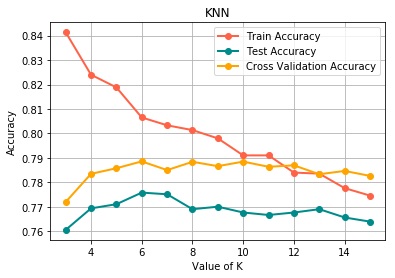

In [50]:
left = list(range(3,16))

train_accu = knn_cost_sen_1[:13]
test_accu = knn_cost_sen_2[:13]
cv_accu = accuracy[:13]


plt.plot(left, train_accu, marker='o', markerfacecolor = 'tomato', 
         markersize = 6, color = 'tomato', linewidth = 2, label = 'Train Accuracy')
plt.plot(left, test_accu, marker='o', markerfacecolor = 'darkcyan', 
         markersize = 6, color = 'darkcyan', linewidth = 2, label = 'Test Accuracy')
plt.plot(left, cv_accu, marker='o', markerfacecolor = 'orange', 
         markersize = 6, color = 'orange', linewidth = 2, label = 'Cross Validation Accuracy')
 

#plt.xlabel('') 
plt.ylabel('Accuracy') 
plt.xlabel('Value of K') 
#plt.title('My bar chart!') 
# plt.ylim(0.6, 1.1) 
ax = plt.axes()        
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.legend()
plt.title('KNN')
plt.show()

In [41]:
knn_cost_sen_1 = []
knn_cost_sen_2 = []
parameters_k = list(range(3,30))
for i in parameters_k:
    tmp_knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_2, Y_train_2['price'])
    knn_predicted_train = tmp_knn.predict(X_train_2)
    err1 = knn_predicted_train - Y_train_2['price']
    err1 = abs(err1)
    err1 = sum(err1)/len(Y_train_2['price'])
    knn_cost_sen_1.append(1 - err1)
    
    knn_predicted_test = tmp_knn.predict(X_test_2)
    err2 = knn_predicted_test - Y_test_2['price']
    err2 = abs(err2)
    err2 = sum(err2)/len(Y_test_2['price'])
    knn_cost_sen_2.append(1 - err2)

In [19]:
# knn_cost_sen_1, knn_cost_sen_2

In [55]:
knn = KNeighborsClassifier(n_neighbors=6) 
knn.fit(X_train_2, Y_train_2['price'])
Y_pred_2 = knn.predict(X_test_2)
#target_names = ['class 0', 'class 1', 'class 2', 'class 3']
#print(classification_report(Y_test_2, Y_pred_2, target_names=target_names))

accuracy = accuracy_score(Y_test_2['price'], Y_pred_2)
precision = precision_score(Y_test_2['price'], Y_pred_2, average = None)
recall = recall_score(Y_test_2['price'], Y_pred_2, average = None)

accuracy, precision, recall

(0.7988466757123474,
 array([0.84823958, 0.55808656, 0.37931034, 0.33333333]),
 array([0.96190913, 0.40901503, 0.09016393, 0.0625    ]))

In [56]:
m_pre = sum(precision)/len(precision)
m_rec = sum(recall)/len(recall)
f1 = 2*m_pre*m_rec/(m_pre+m_rec)
m_pre,m_rec,f1

(0.5297424544107876, 0.3808970230244031, 0.4431552307023058)

### Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
# CV
ran = [5,10,15,20,25,30,40,50,60,70]
accuracy_rf = []
for n in ran:
    rcf = RandomForestClassifier(n_estimators = n)  
    acc = cross_val_score(rcf, X_train_2, Y_train_2['price'], cv=5, scoring='accuracy')
    avgAcc = sum(acc)/5
    accuracy_rf.append(avgAcc)

In [32]:
rf_cost_sen_1 = []
rf_cost_sen_2 = []
parameters_n = [5,10,15,20,25,30,40,50,60,70]
for i in parameters_n:
    tmp_rf = RandomForestClassifier(n_estimators = i).fit(X_train_2, Y_train_2['price'])
    rf_predicted_train = tmp_rf.predict(X_train_2)
    rf_cost_sen_1.append(accuracy_score(Y_train_2['price'], rf_predicted_train))
    
    rf_predicted_test = tmp_rf.predict(X_test_2)
    rf_cost_sen_2.append(accuracy_score(Y_test_2['price'], rf_predicted_test))

In [20]:
# rf_cost_sen_1, rf_cost_sen_2

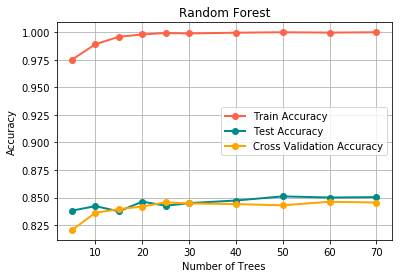

In [53]:
train_accu = rf_cost_sen_1
test_accu = rf_cost_sen_2
cv_accu = accuracy_rf

plt.plot(parameters_n, train_accu, marker='o', markerfacecolor = 'tomato', 
         markersize = 6, color = 'tomato', linewidth = 2, label = 'Train Accuracy')
plt.plot(parameters_n, test_accu, marker='o', markerfacecolor = 'darkcyan', 
         markersize = 6, color = 'darkcyan', linewidth = 2, label = 'Test Accuracy')
plt.plot(parameters_n, cv_accu, marker='o', markerfacecolor = 'orange', 
         markersize = 6, color = 'orange', linewidth = 2, label = 'Cross Validation Accuracy')

plt.ylabel('Accuracy') 
plt.xlabel('Number of Trees') 
ax = plt.axes()        
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.legend()
plt.title('Random Forest')
plt.show()

In [29]:
rf_cost_sen_1 = []
rf_cost_sen_2 = []
parameters_n = [5,10,15,20,25,30,40,50,60,70]
for i in parameters_n:
    tmp_rf = RandomForestClassifier(n_estimators = i).fit(X_train_2, Y_train_2['price'])
    rf_predicted_train = tmp_rf.predict(X_train_2)
    err1 = rf_predicted_train - Y_train_2['price']
    err1 = abs(err1)
    err1 = sum(err1)/len(Y_train_2['price'])
    rf_cost_sen_1.append(1 - err1)
    
    rf_predicted_test = tmp_rf.predict(X_test_2)
    err2 = rf_predicted_test - Y_test_2['price']
    err2 = abs(err2)
    err2 = sum(err2)/len(Y_test_2['price'])
    rf_cost_sen_2.append(1 - err2)

In [21]:
# rf_cost_sen_1, rf_cost_sen_2

In [57]:
rcf = RandomForestClassifier(n_estimators = 60) 
rcf.fit(X_train_2, Y_train_2['price'])
Y_pred_2 = rcf.predict(X_test_2)
#target_names = ['class 0', 'class 1', 'class 2', 'class 3']
#print(classification_report(Y_test_2, Y_pred_2, target_names=target_names))

acc = accuracy_score(Y_test_2['price'], Y_pred_2)
precision = precision_score(Y_test_2['price'], Y_pred_2, average = None)
recall = recall_score(Y_test_2['price'], Y_pred_2, average = None)

acc, precision, recall

(0.8497286295793759,
 array([0.91008293, 0.65254237, 0.53658537, 0.5       ]),
 array([0.95686095, 0.6427379 , 0.18032787, 0.27083333]))

In [58]:
m_pre = sum(precision)/len(precision)
m_rec = sum(recall)/len(recall)
f1 = 2*m_pre*m_rec/(m_pre+m_rec)
m_pre, m_rec, f1

(0.6498026679879876, 0.5126900110169355, 0.573160318385428)